<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')
'''
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 2
plt.rcParams['grid.color'] = "#cccccc"
'''

'\nplt.rcParams[\'axes.facecolor\'] = \'white\'\nplt.rcParams[\'axes.edgecolor\'] = \'white\'\nplt.rcParams[\'axes.grid\'] = True\nplt.rcParams[\'grid.alpha\'] = 2\nplt.rcParams[\'grid.color\'] = "#cccccc"\n'

In [74]:
nifty = pd.read_csv('/content/MMI_2022-01-14.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [75]:
nifty.head(2)

,Date,MMI,Nifty
0,13/01/2022,71.782994,18257.80
1,12/01/2022,66.699395,18212.35


In [76]:
data = pd.DataFrame({'Date':['14/01/2022'] ,'MMI': [72.58],'Nifty':[18255]})

In [77]:
nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,14/01/2022,72.580000,18255.00
0,13/01/2022,71.782994,18257.80
1,12/01/2022,66.699395,18212.35


In [78]:
#len(nifty)

In [79]:
#nifty = nifty.iloc[1200:]

In [80]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [81]:
nifty.head(5)

,Date,MMI,Nifty
0,2022-01-14,72.580000,18255.00
0,2022-01-13,71.782994,18257.80
1,2022-01-12,66.699395,18212.35
2,2022-01-11,62.440797,18055.75
3,2022-01-10,61.970385,18003.30


In [82]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [83]:
nifty= nifty.set_index('Date')

In [84]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [85]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [86]:
nifty_new=nifty[::-1].copy()

In [87]:
stdv = 0.8
nifty_new['macd']=nifty_new['MMI'].ewm(span=50, adjust=False).mean()-nifty_new['MMI'].ewm(span=200, adjust=False).mean()
nifty_new['signal']=nifty_new['macd'].ewm(span=35,adjust=False).mean()
nifty_new['Sdev'] = nifty_new['macd'].rolling(window=35).std()
nifty_new['Upper Band'] = nifty_new['signal'] + (nifty_new['Sdev'] *stdv)
nifty_new['Lower Band'] = nifty_new['signal'] - (nifty_new['Sdev'] *stdv)
#nifty_new['Upper Band']=nifty['Upper Band'].shift(-35)
#nifty_new['Lower Band']=nifty['Lower Band'].shift(-35)

In [88]:
nifty['45 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['20 Day'] = nifty['MMI'][::-1].rolling(window=20).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

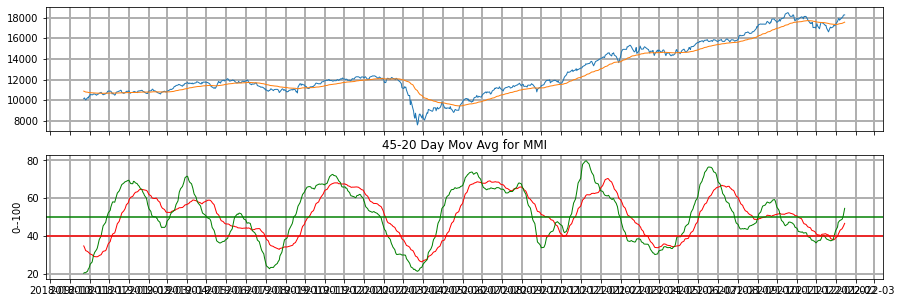

<Figure size 432x288 with 0 Axes>

In [89]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['45 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )
ax[1].axhline(y=50 , color= 'g')
ax[1].axhline(y=40 , color= 'r')
plt.title('45-20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
plt.show()
plt.savefig('mmi.png')

In [90]:
nifty_new=nifty_new[-600:].copy()

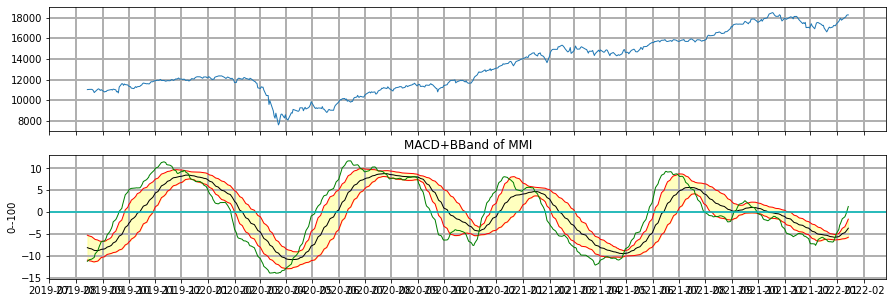

<Figure size 432x288 with 0 Axes>

In [91]:
from matplotlib.dates import MonthLocator, YearLocator
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty_new.index.values,nifty_new['Nifty'].values,linewidth=1 )
ax[1].plot(nifty_new.index.values,nifty_new['signal'].values,color='k',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Upper Band'].values[:],color='r',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Lower Band'].values[:],color='r',linewidth=1 )
ax[1].fill_between(
    nifty_new.index.values[:],nifty_new['Upper Band'].values[:], nifty_new['Lower Band'].values[:], 
    interpolate=True, color="yellow", alpha=0.25, 
    label="Positive"
)
ax[1].plot(nifty_new.index.values[:],nifty_new['macd'].values[:],color= 'g',linewidth=1 )
#ax[0].plot(nifty_new.index.values[:],nifty_new['50ema'].values[:],color= 'b',linewidth=1 )
ax[1].axhline(y=0 , color= 'c')
plt.title('MACD+BBand of MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
plt.show()
plt.savefig('mmi_bb.png')

In [92]:
def plot_buy_sell_signal(df):
  signal=[]
  for i in range(len(df)):
   
    if df['20 Day'].iloc[i]<df['45 Day'].iloc[i] and df['20 Day'].iloc[i]<40 :
      signal.append(i)
    
  return signal

In [93]:
def draw_plot(labels,df,t=500):
  
  df=df[:t]
  buy=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[0].plot(df.loc[:, :].index, df.loc[:, '50ema'], label='50 ema')
  ax[1].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[1].scatter(df.iloc[buy].index,df.iloc[buy].Nifty,marker='.',label='Volatile',color='r')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MMI-Regime ')
  ax[1].legend(loc='upper left')
  
  
  fig.suptitle(labels)
  plt.show()

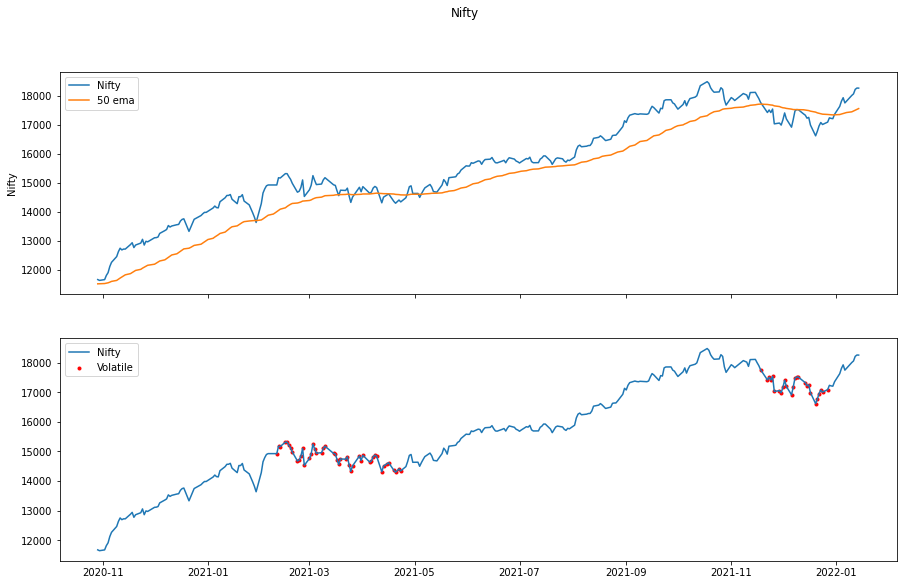

In [94]:
draw_plot('Nifty',nifty,300)

In [95]:
buy=plot_buy_sell_signal(nifty)

In [96]:
nifty.iloc[buy[0]].name

Timestamp('2021-12-27 00:00:00')

In [97]:
#https://www.python-graph-gallery.com/area-fill-between-two-lines-in-matplotlib